In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv('pcdataset.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


FEATURES INBRIEF EXPLANATION

Domain of the URL:
Here, we are just extracting the domain present in the URL. This feature doesn't have much significance in the training. May even be dropped while training the model.

IP Address in the URL:
Checks for the presence of IP address in the URL. URLs may have IP address instead of domain name. If an IP address is used as an alternative of the domain name in the URL, we can be sure that someone is trying to steal personal information with this URL.
If the domain part of URL has IP address, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

 "@" Symbol in URL:
Checks for the presence of '@' symbol in the URL. Using “@” symbol in the URL leads the browser to ignore everything preceding the “@” symbol and the real address often follows the “@” symbol.
If the URL has '@' symbol, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Length of URL:
Computes the length of the URL. Phishers can use long URL to hide the doubtful part in the address bar. In this project, if the length of the URL is greater than or equal 54 characters then the URL classified as phishing otherwise legitimate.
If the length of URL >= 54 , the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Depth of URL:
Computes the depth of the URL. This feature calculates the number of sub pages in the given url based on the '/'.
The value of feature is a numerical based on the URL.

Redirection "//" in URL:
Checks the presence of "//" in the URL. The existence of “//” within the URL path means that the user will be redirected to another website. The location of the “//” in URL is computed. We find that if the URL starts with “HTTP”, that means the “//” should appear in the sixth position. However, if the URL employs “HTTPS” then the “//” should appear in seventh position.
If the "//" is anywhere in the URL apart from after the protocal, thee value assigned to this feature is 1 (phishing) or else 0 (legitimate).

"http/https" in Domain name:
Checks for the presence of "http/https" in the domain part of the URL. The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users.
If the URL has "http/https" in the domain part, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Using URL Shortening Services “TinyURL”:
URL shortening is a method on the “World Wide Web” in which a URL may be made considerably smaller in length and still lead to the required webpage. This is accomplished by means of an “HTTP Redirect” on a domain name that is short, which links to the webpage that has a long URL.
If the URL is using Shortening Services, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Prefix or Suffix "-" in Domain:
Checking the presence of '-' in the domain part of URL. The dash symbol is rarely used in legitimate URLs. Phishers tend to add prefixes or suffixes separated by (-) to the domain name so that users feel that they are dealing with a legitimate webpage.
If the URL has '-' symbol in the domain part of the URL, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

DNS Record:
For phishing websites, either the claimed identity is not recognized by the WHOIS database or no records founded for the hostname. If the DNS record is empty or not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Web Traffic:
This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit. However, since phishing websites live for a short period of time, they may not be recognized by the Alexa database (Alexa the Web Information Company., 1996). By reviewing our dataset, we find that in worst scenarios, legitimate websites ranked among the top 100,000. Furthermore, if the domain has no traffic or is not recognized by the Alexa database, it is classified as “Phishing”.
If the rank of the domain < 100000, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

Age of Domain:
This feature can be extracted from WHOIS database. Most phishing websites live for a short period of time. The minimum age of the legitimate domain is considered to be 12 months for this project. Age here is nothing but different between creation and expiration time.
If age of domain > 12 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

End Period of Domain:
This feature can be extracted from WHOIS database. For this feature, the remaining domain time is calculated by finding the different between expiration time & current time. The end period considered for the legitimate domain is 6 months or less for this project.
If end period of domain > 6 months, the vlaue of this feature is 1 (phishing) else 0 (legitimate).

IFrame Redirection:
IFrame is an HTML tag used to display an additional webpage into one that is currently shown. Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders. In this regard, phishers make use of the “frameBorder” attribute which causes the browser to render a visual delineation.
If the iframe is empty or repsonse is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Status Bar Customization:
Phishers may use JavaScript to show a fake URL in the status bar to users. To extract this feature, we must dig-out the webpage source code, particularly the “onMouseOver” event, and check if it makes any changes on the status bar
If the response is empty or onmouseover is found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Disabling Right Click:
Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code. This feature is treated exactly as “Using onMouseOver to hide the Link”. Nonetheless, for this feature, we will search for event “event.button==2” in the webpage source code and check if the right click is disabled.
If the response is empty or onmouseover is not found then, the value assigned to this feature is 1 (phishing) or else 0 (legitimate).

Website Forwarding:
The fine line that distinguishes phishing websites from legitimate ones is how many times a website has been redirected. In our dataset, we find that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.

## **1. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Checking the shape of the dataset
data0.shape

(10000, 18)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## **2. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

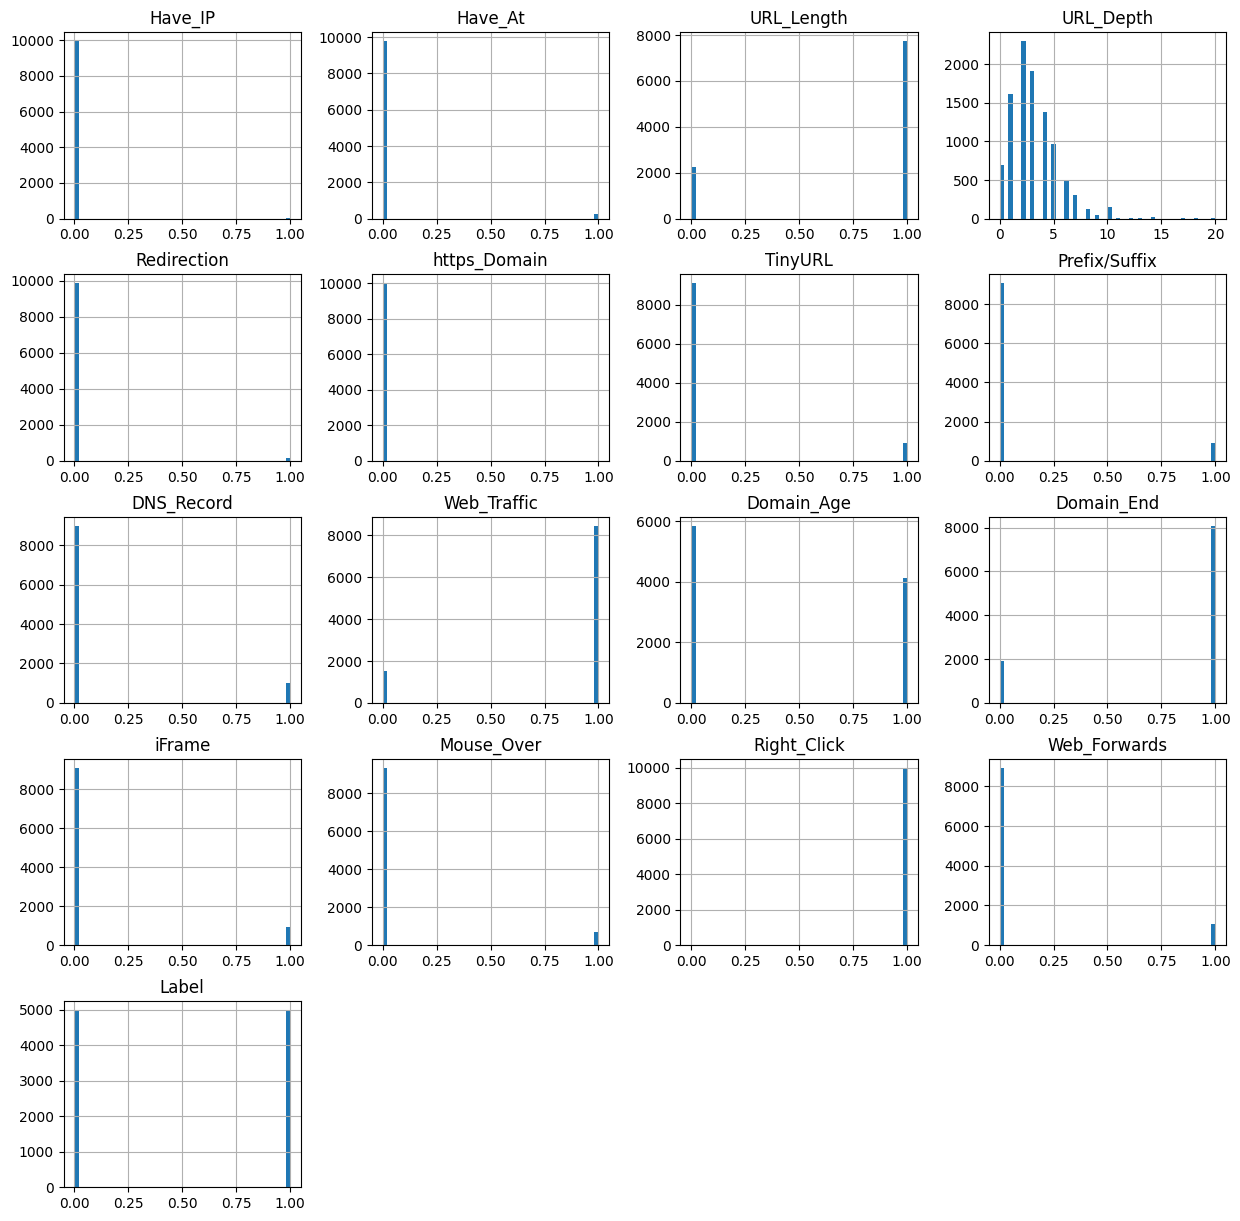

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

## *3. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [11]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset.

In [12]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [13]:
#checking the data for null or missing values
data.isnull().sum()

,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0
Web_Traffic,0


In [14]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,5,0,0,0,0,1,1,1,1,1,1,1,1,0
3,0,1,1,2,0,0,0,0,1,1,1,1,0,0,1,0,1
4,0,0,1,2,0,0,0,0,0,0,0,1,0,0,1,0,1


## **4. Splitting the Data**

In [15]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [16]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

## **5. Machine Learning Models & Training**

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0).
* Decision Tree
* Random Forest
* XGBoost
* Support Vector Machines

In [17]:
#importing packages
from sklearn.metrics import accuracy_score

In [18]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **5.1. Decision Tree Classifier**


In [19]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [20]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [21]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.814
Decision Tree: Accuracy on test Data: 0.811


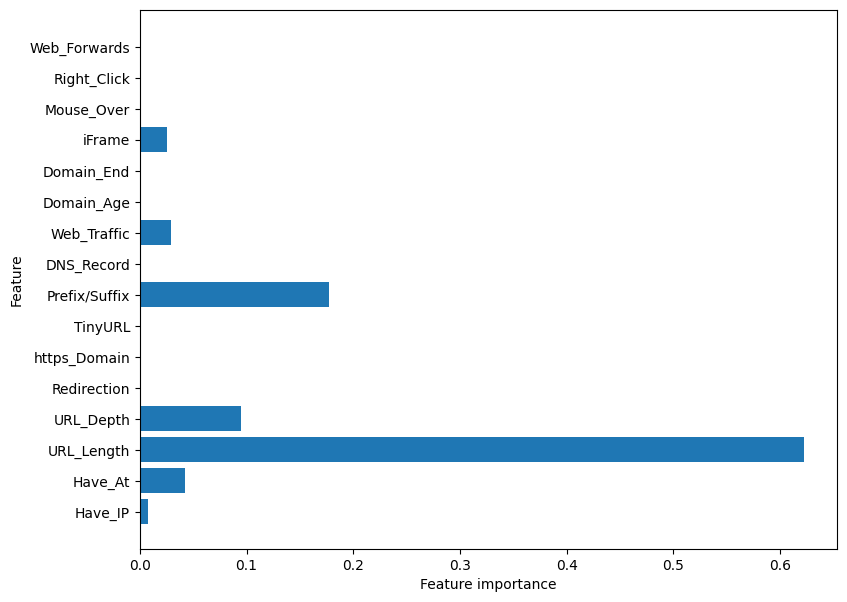

In [22]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [23]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **5.2. Random Forest Classifier**

In [24]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [25]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [26]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.816
Random forest: Accuracy on test Data: 0.815


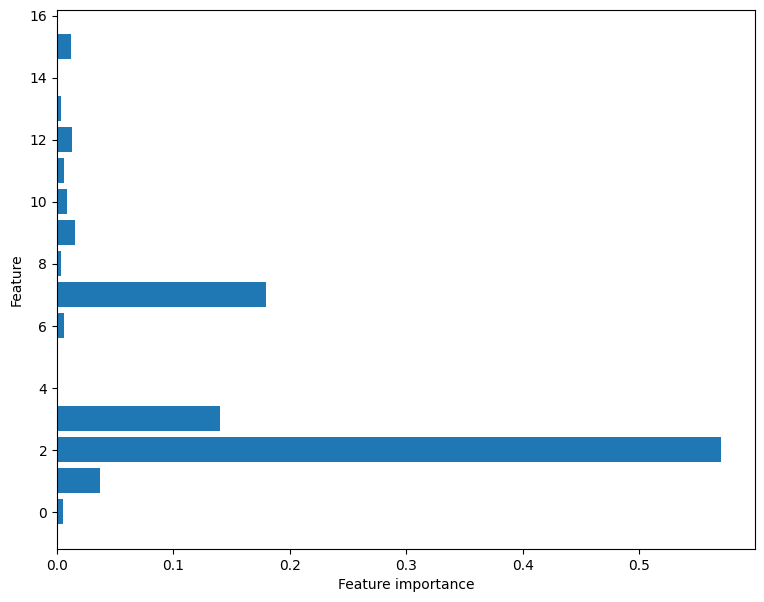

In [41]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [28]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **5.3. XGBoost Classifier**

In [31]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [33]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.864


**Storing the results:**

In [34]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### **5.4. Support Vector Machines**

In [35]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [36]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [37]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.803
SVM : Accuracy on test Data: 0.797


**Storing the results:**

In [38]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

## **6. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [39]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.814,0.812
1,Random Forest,0.816,0.815
2,XGBoost,0.866,0.864
3,SVM,0.803,0.797


In [40]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.866,0.864
1,Random Forest,0.816,0.815
0,Decision Tree,0.814,0.812
3,SVM,0.803,0.797


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.